In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import itertools

from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.cross_validation import KFold
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import warnings
warnings.filterwarnings('ignore')

from sklearn.ensemble import RandomForestClassifier 
from sklearn.preprocessing import StandardScaler #Standardisation

from sklearn.model_selection import KFold #for K-fold cross validation
from sklearn.model_selection import cross_val_score #score evaluation

from sklearn.ensemble import VotingClassifier #for Voting Classifier

In [4]:
diab_data = pd.read_csv('diabetes.csv')

In [5]:
diab_data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


Additional details about attributes

Pregnancies: Number of times pregnant

Glucose: Plasma glucose concentration a 2 hours in an oral glucose tolerance test

BloodPressure: Diastolic blood pressure (mm Hg)

SkinThickness: Triceps skin fold thickness (mm)

Insulin: 2-Hour serum insulin (mu U/ml)

BMI: Body mass index (weight in kg/(height in m)^2)

DiabetesPedigreeFunction: Diabetes pedigree function

Age: Age (years)

Outcome: Class variable (0 or 1)



In [13]:
diab_data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


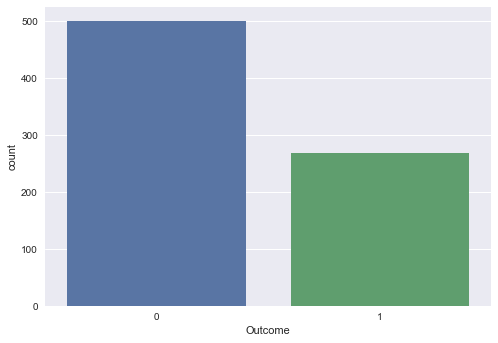

In [16]:
sns.countplot(x="Outcome",data=diab_data)
plt.show()

Distribution of each attribute for all 

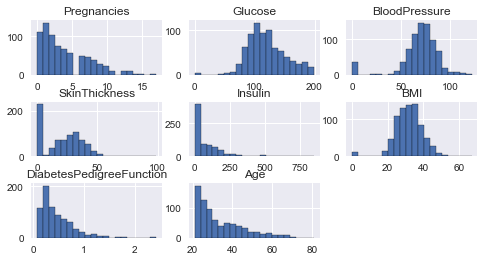

In [17]:

columns=diab_data.columns[:8]
length=len(columns)
for i,j in itertools.zip_longest(columns,range(length)):
    plt.subplot((length/2),3,j+1)
    plt.subplots_adjust(wspace=0.2,hspace=0.5)
    diab_data[i].hist(bins=20,edgecolor='black')
    plt.title(i)
plt.show()

Distribution of attributes for Diabetic Patients

C:\Users\LAAVANYA\Anaconda\lib\site-packages\statsmodels\nonparametric\kde.py:494: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X,a,b,gridsize)/(delta*nobs)
C:\Users\LAAVANYA\Anaconda\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


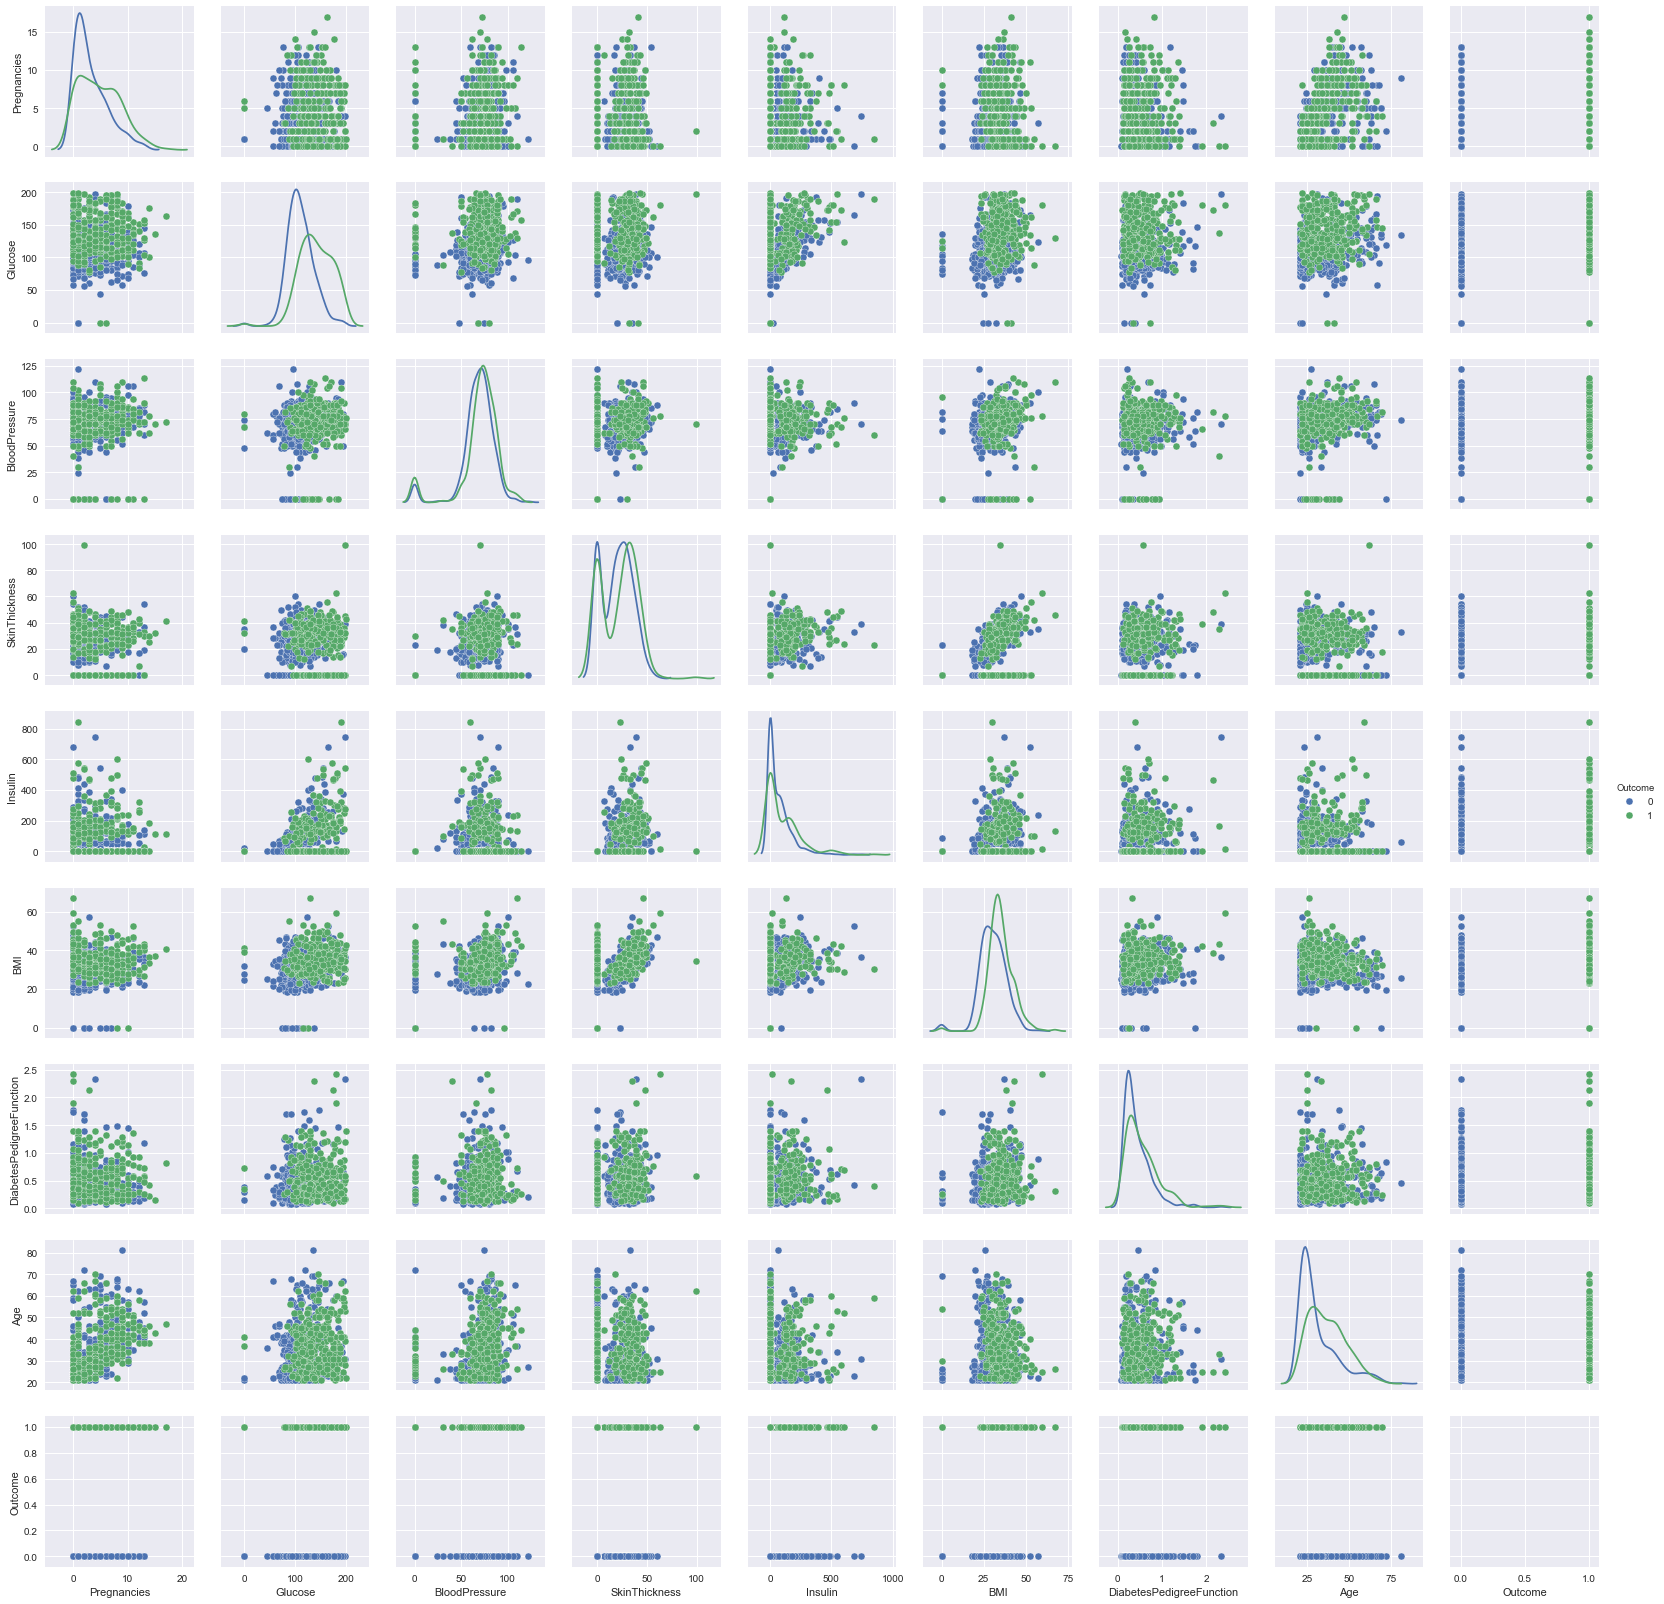

In [18]:
sns.pairplot(data=diab_data,hue='Outcome',diag_kind='kde')
plt.show()

Predictive Modelling

1. Stratification - Splitting into train and test sets

In [23]:
outcome=diab_data['Outcome']
data=diab_data[diab_data.columns[:8]]
train,test=train_test_split(diab_data,test_size=0.25,random_state=0,stratify=diab_data['Outcome'])# stratify the outcome
train_X=train[train.columns[:8]]
test_X=test[test.columns[:8]]
train_Y=train['Outcome']
test_Y=test['Outcome']

In [24]:
train_X.head(2)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
432,1,80,74,11,60,30.0,0.527,22
453,2,119,0,0,0,19.6,0.832,72


In [25]:
train_Y.head(2)

432    0
453    0
Name: Outcome, dtype: int64

Without Feature Selection

In [30]:
types=['rbf','linear']
for i in types:
    model=svm.SVC(kernel=i)
    model.fit(train_X,train_Y)
    prediction=model.predict(test_X)
    print("Accuracy for SVM kernel=",i,"is",metrics.accuracy_score(prediction,test_Y))


Accuracy for SVM kernel= rbf is 0.651041666667
Accuracy for SVM kernel= linear is 0.770833333333


In [31]:
model = LogisticRegression()
model.fit(train_X,train_Y)
prediction=model.predict(test_X)
print('The accuracy of the Logistic Regression is',metrics.accuracy_score(prediction,test_Y))

The accuracy of the Logistic Regression is 0.776041666667


In [32]:
model=DecisionTreeClassifier()
model.fit(train_X,train_Y)
prediction=model.predict(test_X)
print('The accuracy of the Decision Tree is',metrics.accuracy_score(prediction,test_Y))

The accuracy of the Decision Tree is 0.78125


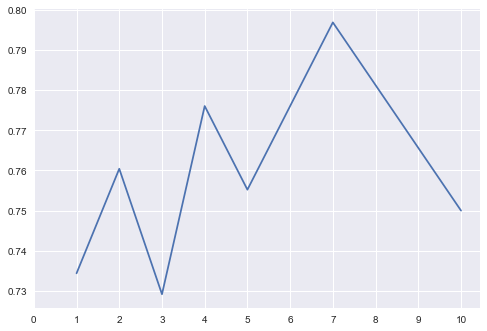

Accuracies for different values of n are: [ 0.734375    0.76041667  0.72916667  0.77604167  0.75520833  0.77604167
  0.796875    0.78125     0.765625    0.75      ]


In [33]:
a_index=list(range(1,11))
a=pd.Series()
x=[0,1,2,3,4,5,6,7,8,9,10]
for i in list(range(1,11)):
    model=KNeighborsClassifier(n_neighbors=i) 
    model.fit(train_X,train_Y)
    prediction=model.predict(test_X)
    a=a.append(pd.Series(metrics.accuracy_score(prediction,test_Y)))
plt.plot(a_index, a)
plt.xticks(x)
plt.show()
print('Accuracies for different values of n are:',a.values)

Overview of all models

In [34]:
abc=[]
classifiers=['Linear Svm','Radial Svm','Logistic Regression','KNN','Decision Tree']
models=[svm.SVC(kernel='linear'),svm.SVC(kernel='rbf'),LogisticRegression(),KNeighborsClassifier(n_neighbors=3),DecisionTreeClassifier()]
for i in models:
    model = i
    model.fit(train_X,train_Y)
    prediction=model.predict(test_X)
    abc.append(metrics.accuracy_score(prediction,test_Y))
models_dataframe=pd.DataFrame(abc,index=classifiers)   
models_dataframe.columns=['Accuracy']
models_dataframe

,Accuracy
Linear Svm,0.770833
Radial Svm,0.651042
Logistic Regression,0.776042
KNN,0.729167
Decision Tree,0.760417


Feature Selection

We can choose important features in 2 ways:

a)Correlation matrix--> selecting only the uncorrelated features.

b)RandomForestClassifier--> It gives the importance of the features

Correlation matrix

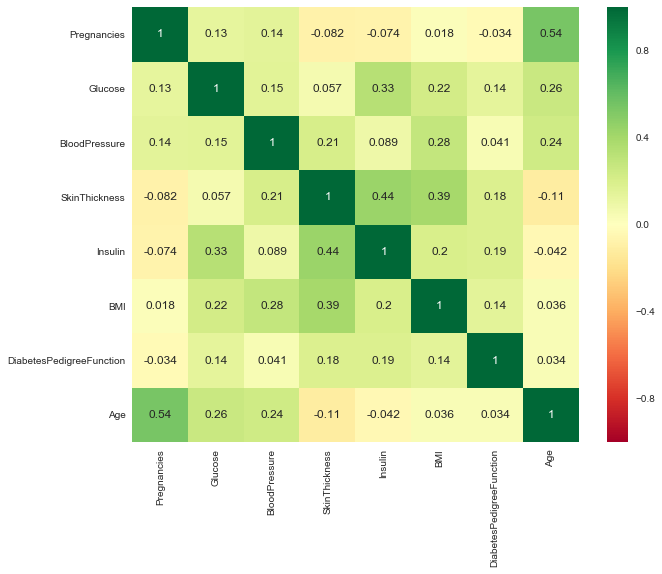

In [35]:
sns.heatmap(diab_data[diab_data.columns[:8]].corr(),annot=True,cmap='RdYlGn')
fig=plt.gcf()
fig.set_size_inches(10,8)
plt.show()

All features look to be uncorrelated, cannot eliminate any features

In [37]:

model= RandomForestClassifier(n_estimators=100,random_state=0)
X=diab_data[diab_data.columns[:8]]
Y=diab_data['Outcome']
model.fit(X,Y)
pd.Series(model.feature_importances_,index=X.columns).sort_values(ascending=False)

Glucose                     0.242098
BMI                         0.172574
Age                         0.135220
DiabetesPedigreeFunction    0.128324
BloodPressure               0.092903
Pregnancies                 0.086774
SkinThickness               0.073109
Insulin                     0.068999
dtype: float64

In [38]:
diab2=diab_data[['Glucose','BMI','Age','DiabetesPedigreeFunction','Outcome']]

features=diab2[diab2.columns[:4]]
features_standard=StandardScaler().fit_transform(features)# Gaussian Standardisation
x=pd.DataFrame(features_standard,columns=[['Glucose','BMI','Age','DiabetesPedigreeFunction']])
x['Outcome']=diab2['Outcome']
outcome=x['Outcome']
train1,test1=train_test_split(x,test_size=0.25,random_state=0,stratify=x['Outcome'])
train_X1=train1[train1.columns[:4]]
test_X1=test1[test1.columns[:4]]
train_Y1=train1['Outcome']
test_Y1=test1['Outcome']

In [39]:
abc=[]
classifiers=['Linear Svm','Radial Svm','Logistic Regression','KNN','Decision Tree']
models=[svm.SVC(kernel='linear'),svm.SVC(kernel='rbf'),LogisticRegression(),KNeighborsClassifier(n_neighbors=3),DecisionTreeClassifier()]
for i in models:
    model = i
    model.fit(train_X1,train_Y1)
    prediction=model.predict(test_X1)
    abc.append(metrics.accuracy_score(prediction,test_Y1))
new_models_dataframe=pd.DataFrame(abc,index=classifiers)   
new_models_dataframe.columns=['New Accuracy']    

In [40]:
new_models_dataframe=new_models_dataframe.merge(models_dataframe,left_index=True,right_index=True,how='left')
new_models_dataframe['Increase']=new_models_dataframe['New Accuracy']-new_models_dataframe['Accuracy']
new_models_dataframe

,New Accuracy,Accuracy,Increase
Linear Svm,0.781250,0.770833,0.010417
Radial Svm,0.770833,0.651042,0.119792
Logistic Regression,0.776042,0.776042,0.000000
KNN,0.729167,0.729167,0.000000
Decision Tree,0.734375,0.760417,-0.026042


Cross Validation

In [42]:
kfold = KFold(n_splits=10, random_state=22) # k=10, split the data into 10 equal parts

In [43]:
xyz=[]
accuracy=[]
classifiers=['Linear Svm','Radial Svm','Logistic Regression','KNN','Decision Tree']
models=[svm.SVC(kernel='linear'),svm.SVC(kernel='rbf'),LogisticRegression(),KNeighborsClassifier(n_neighbors=3),DecisionTreeClassifier()]
for i in models:
    model = i
    cv_result = cross_val_score(model,x[x.columns[:4]],x['Outcome'], cv = kfold,scoring = "accuracy")
    cv_result=cv_result
    xyz.append(cv_result.mean())
    accuracy.append(cv_result)
new_models_dataframe2=pd.DataFrame(abc,index=classifiers)   
new_models_dataframe2.columns=['CV Mean']    
new_models_dataframe2

,CV Mean
Linear Svm,0.781250
Radial Svm,0.770833
Logistic Regression,0.776042
KNN,0.729167
Decision Tree,0.734375


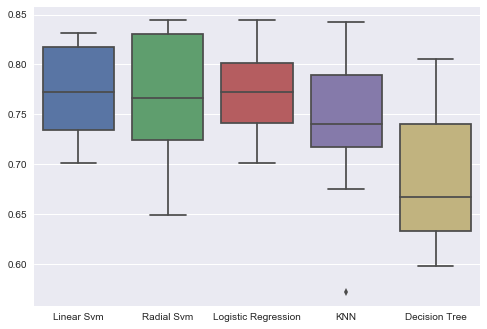

In [44]:
box=pd.DataFrame(accuracy,index=[classifiers])
sns.boxplot(box.T)
plt.show()

Ensemble of models

In [45]:
linear_svc=svm.SVC(kernel='linear',C=0.1,gamma=10,probability=True)
radial_svm=svm.SVC(kernel='rbf',C=0.1,gamma=10,probability=True)
lr=LogisticRegression(C=0.1)

In [47]:
ensemble_lin_rbf=VotingClassifier(estimators=[('Linear_svm', linear_svc), ('Radial_svm', radial_svm)], 
                       voting='soft', weights=[2,1]).fit(train_X1,train_Y1)
print('The accuracy for Linear and Radial SVM is:',ensemble_lin_rbf.score(test_X1,test_Y1))

The accuracy for Linear and Radial SVM is: 0.770833333333


In [48]:
ensemble_lin_lr=VotingClassifier(estimators=[('Linear_svm', linear_svc), ('Logistic Regression', lr)], 
                       voting='soft', weights=[2,1]).fit(train_X1,train_Y1)
print('The accuracy for Linear SVM and Logistic Regression is:',ensemble_lin_lr.score(test_X1,test_Y1))

The accuracy for Linear SVM and Logistic Regression is: 0.78125


In [49]:
ensemble_rad_lr=VotingClassifier(estimators=[('Radial_svm', radial_svm), ('Logistic Regression', lr)], 
                       voting='soft', weights=[1,2]).fit(train_X1,train_Y1)
print('The accuracy for Radial SVM and Logistic Regression is:',ensemble_rad_lr.score(test_X1,test_Y1))

The accuracy for Radial SVM and Logistic Regression is: 0.78125


In [50]:
ensemble_rad_lr_lin=VotingClassifier(estimators=[('Radial_svm', radial_svm), ('Logistic Regression', lr),('Linear_svm',linear_svc)], 
                       voting='soft', weights=[2,1,3]).fit(train_X1,train_Y1)
print('The ensembled model with all the 3 classifiers is:',ensemble_rad_lr_lin.score(test_X1,test_Y1))

The ensembled model with all the 3 classifiers is: 0.78125
